<a href="https://colab.research.google.com/github/AudreyKrishnadasan/AIHeartDiseasePrediction/blob/main/Exploring_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
filepath = '/content/gdrive/MyDrive/Audrey Krishnadasan AI'
#filepath = '/content/gdrive/MyDrive/InspiritAI/Students/Audrey Krishnadasan AI'
os.chdir(filepath)

In [ ]:
pat = 'Token here'
!git clone https://{pat}@github.com/username/repo.git

## Weird even / odd data

In [ ]:
hearts = pd.read_csv("heart_data.csv")

In [ ]:
hearts

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


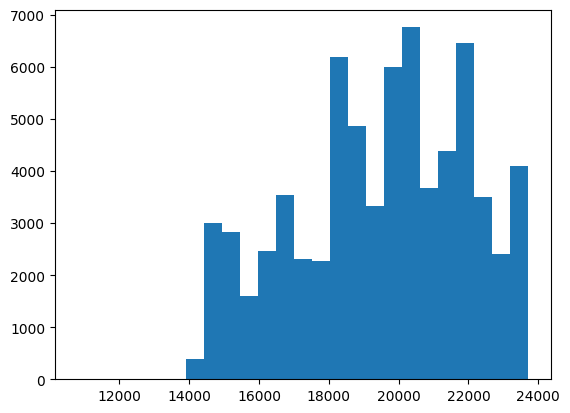

In [ ]:
plt.hist(hearts['age'], bins=25);

In [ ]:
np.min(hearts['age']) / 365.25

29.56331279945243

In [ ]:
np.max(hearts['age']) / 365.25

64.92265571526352

In [ ]:
np.median(hearts['age']) / 365.25

53.94387405886379

In [ ]:
np.mean(hearts['age']) / 365.25

53.302849594211395

In [ ]:
np.std(hearts['age']) / 365.25

6.754918669273828

In [ ]:
from scipy import stats as st

In [ ]:
st.mode(hearts['age'])

<ipython-input-19-73dc632e0323>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(hearts['age'])


ModeResult(mode=array([18236]), count=array([32]))

In [ ]:
18236 / 365.25

49.927446954141

In [ ]:
hearts['years'] = hearts['age'] / 365.25

In [ ]:
hearts['years'] = hearts['years'].astype(int)

In [ ]:
years = hearts.groupby(by='years', as_index=False).agg({"id":"count"})

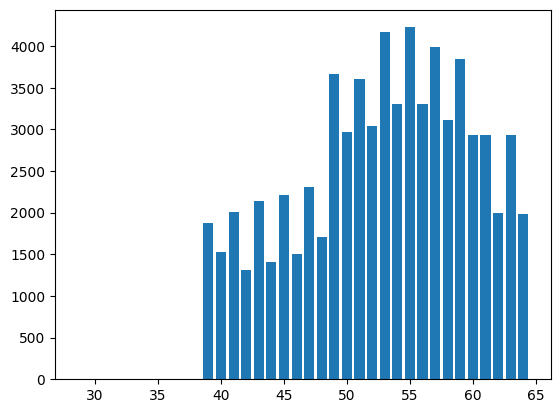

In [ ]:
plt.bar(x=years['years'], height=years['id']);

In [ ]:
np.unique(hearts['cardio'], return_counts=True)

(array([0, 1]), array([35021, 34979]))

In [ ]:
yesses = hearts[hearts['cardio']==1]

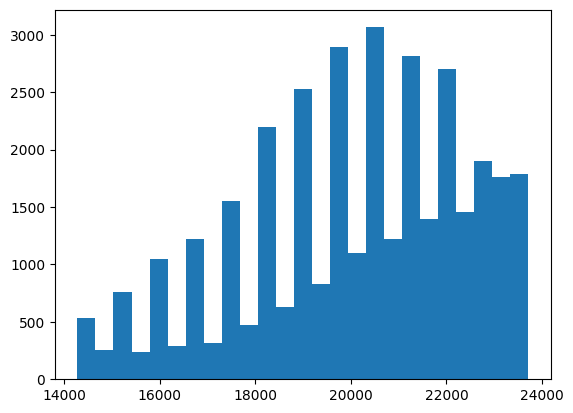

In [ ]:
plt.hist(yesses['age'], bins=25);

In [ ]:
cho = hearts[hearts['cholesterol']==2]

(array([247., 127., 312.,  95., 361.,  95., 401.,  84., 476., 151., 714.,
        188., 743., 221., 834., 241., 811., 302., 735., 318., 661., 292.,
        427., 350., 363.]),
 array([14282. , 14658.4, 15034.8, 15411.2, 15787.6, 16164. , 16540.4,
        16916.8, 17293.2, 17669.6, 18046. , 18422.4, 18798.8, 19175.2,
        19551.6, 19928. , 20304.4, 20680.8, 21057.2, 21433.6, 21810. ,
        22186.4, 22562.8, 22939.2, 23315.6, 23692. ]),
 <BarContainer object of 25 artists>)

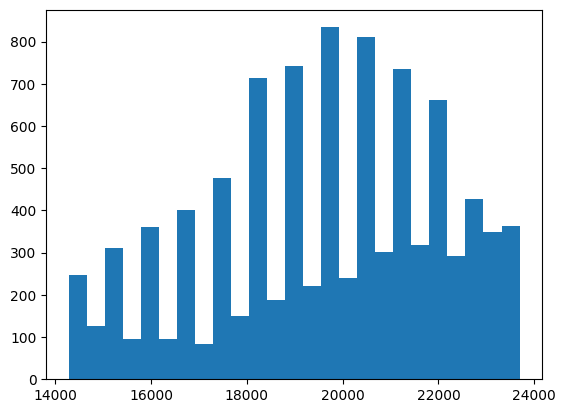

In [ ]:
plt.hist(cho['age'], bins=25)

In [ ]:
ap_lo = hearts[hearts['ap_lo']==80]

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.980e+02, 1.377e+03, 1.434e+03, 8.430e+02, 1.071e+03, 1.702e+03,
        1.229e+03, 1.105e+03, 3.031e+03, 2.620e+03, 1.655e+03, 3.003e+03,
        3.466e+03, 1.935e+03, 2.199e+03, 3.174e+03, 1.604e+03, 1.114e+03,
        1.985e+03]),
 array([10859.  , 11373.16, 11887.32, 12401.48, 12915.64, 13429.8 ,
        13943.96, 14458.12, 14972.28, 15486.44, 16000.6 , 16514.76,
        17028.92, 17543.08, 18057.24, 18571.4 , 19085.56, 19599.72,
        20113.88, 20628.04, 21142.2 , 21656.36, 22170.52, 22684.68,
        23198.84, 23713.  ]),
 <BarContainer object of 25 artists>)

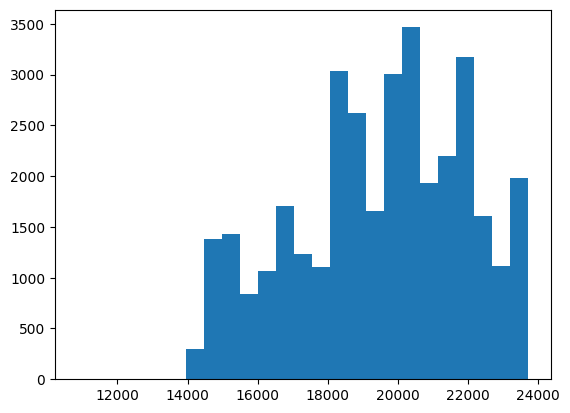

In [ ]:
plt.hist(ap_lo['age'], bins=25)

In [ ]:
ap_hi = hearts[hearts['ap_hi']==110]

(array([  1.,   0.,   0.,   0.,   0.,   0., 287., 506., 666., 348., 378.,
        583., 436., 305., 798., 658., 377., 617., 670., 325., 392., 556.,
        230., 189., 322.]),
 array([10964.  , 11472.36, 11980.72, 12489.08, 12997.44, 13505.8 ,
        14014.16, 14522.52, 15030.88, 15539.24, 16047.6 , 16555.96,
        17064.32, 17572.68, 18081.04, 18589.4 , 19097.76, 19606.12,
        20114.48, 20622.84, 21131.2 , 21639.56, 22147.92, 22656.28,
        23164.64, 23673.  ]),
 <BarContainer object of 25 artists>)

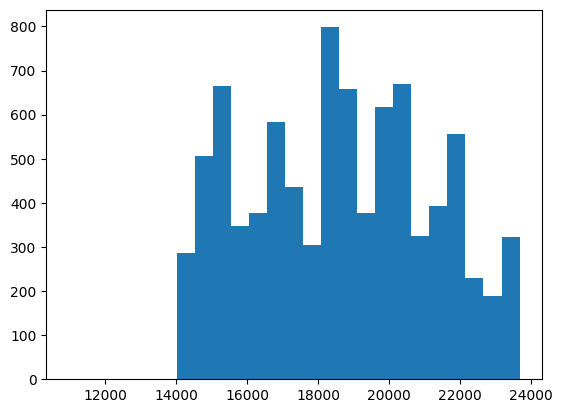

In [ ]:
plt.hist(ap_hi['age'], bins=25)

In [ ]:
gluc = hearts[hearts['gluc']==1]

(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.590e+02, 2.696e+03, 2.559e+03, 1.424e+03, 2.211e+03, 3.123e+03,
        2.024e+03, 2.003e+03, 5.352e+03, 4.199e+03, 2.846e+03, 5.088e+03,
        5.673e+03, 3.018e+03, 3.558e+03, 5.318e+03, 2.804e+03, 1.927e+03,
        3.293e+03]),
 array([10798. , 11314.6, 11831.2, 12347.8, 12864.4, 13381. , 13897.6,
        14414.2, 14930.8, 15447.4, 15964. , 16480.6, 16997.2, 17513.8,
        18030.4, 18547. , 19063.6, 19580.2, 20096.8, 20613.4, 21130. ,
        21646.6, 22163.2, 22679.8, 23196.4, 23713. ]),
 <BarContainer object of 25 artists>)

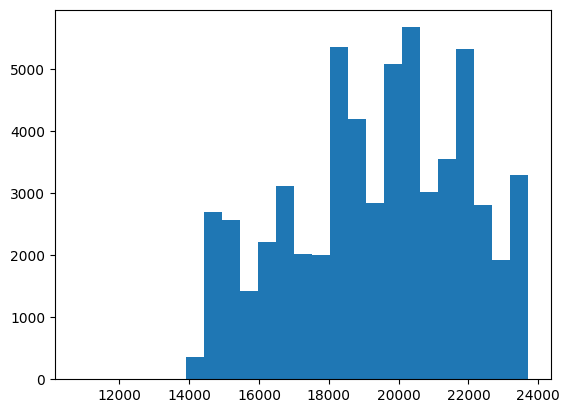

In [ ]:
plt.hist(gluc['age'], bins=25)

In [ ]:
height = hearts[hearts['height']==168]

(array([128.,  79., 160.,  52., 184.,  60., 200.,  46., 213.,  61., 326.,
         97., 367.,  86., 352.,  96., 394., 107., 394., 105., 332.,  84.,
        189.,  94., 193.]),
 array([14277. , 14652.2, 15027.4, 15402.6, 15777.8, 16153. , 16528.2,
        16903.4, 17278.6, 17653.8, 18029. , 18404.2, 18779.4, 19154.6,
        19529.8, 19905. , 20280.2, 20655.4, 21030.6, 21405.8, 21781. ,
        22156.2, 22531.4, 22906.6, 23281.8, 23657. ]),
 <BarContainer object of 25 artists>)

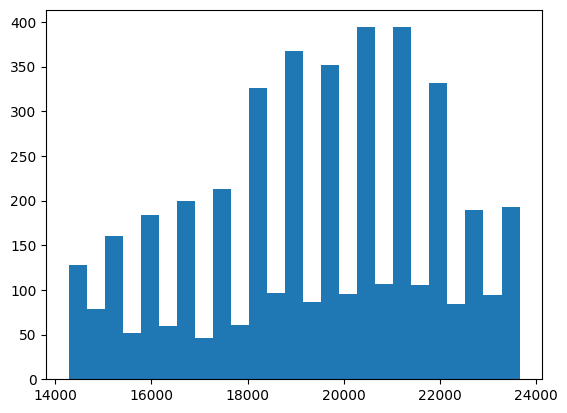

In [ ]:
plt.hist(height['age'], bins=25)

In [ ]:
weight = hearts[hearts['weight']==67.0]

(array([ 68.,  17.,  69.,  25.,  51.,  12.,  71.,  20.,  85.,  24., 133.,
         34., 135.,  24., 138.,  27., 133.,  37., 108.,  34., 139.,  38.,
         83.,  29.,  80.]),
 array([14291.  , 14664.04, 15037.08, 15410.12, 15783.16, 16156.2 ,
        16529.24, 16902.28, 17275.32, 17648.36, 18021.4 , 18394.44,
        18767.48, 19140.52, 19513.56, 19886.6 , 20259.64, 20632.68,
        21005.72, 21378.76, 21751.8 , 22124.84, 22497.88, 22870.92,
        23243.96, 23617.  ]),
 <BarContainer object of 25 artists>)

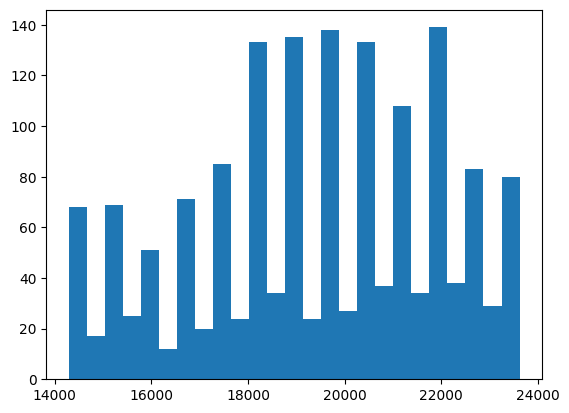

In [ ]:
plt.hist(weight['age'], bins=25)

In [ ]:
active = hearts[hearts['active']==1]

(array([   4.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         663., 1973.,  912., 1805.,  934., 1980., 1077., 1972., 1090.,
        2108., 1794., 3562., 1888., 3444., 2239., 3749., 2426., 3671.,
        2332., 3367., 2387., 3066., 1969., 1969., 1984., 1896.]),
 array([10798., 11167., 11536., 11905., 12274., 12643., 13012., 13381.,
        13750., 14119., 14488., 14857., 15226., 15595., 15964., 16333.,
        16702., 17071., 17440., 17809., 18178., 18547., 18916., 19285.,
        19654., 20023., 20392., 20761., 21130., 21499., 21868., 22237.,
        22606., 22975., 23344., 23713.]),
 <BarContainer object of 35 artists>)

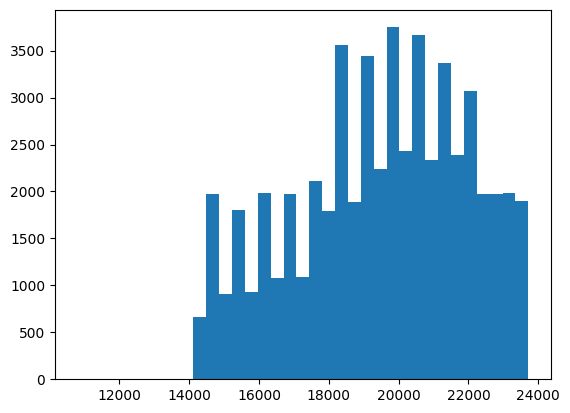

In [ ]:
plt.hist(active['age'], bins=35)

In [ ]:
smoke = hearts[hearts['smoke']==1]

(array([258.,  92., 319.,  87., 315.,  84., 343.,  73., 356.,  95., 485.,
        119., 501., 132., 479., 164., 502., 156., 402., 156., 327., 149.,
        269., 130., 176.]),
 array([14292. , 14667.8, 15043.6, 15419.4, 15795.2, 16171. , 16546.8,
        16922.6, 17298.4, 17674.2, 18050. , 18425.8, 18801.6, 19177.4,
        19553.2, 19929. , 20304.8, 20680.6, 21056.4, 21432.2, 21808. ,
        22183.8, 22559.6, 22935.4, 23311.2, 23687. ]),
 <BarContainer object of 25 artists>)

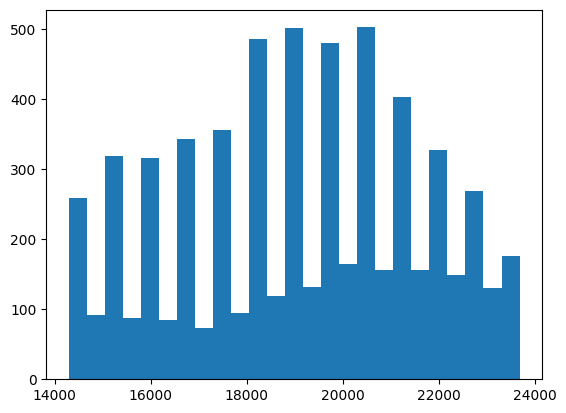

In [ ]:
plt.hist(smoke['age'], bins=25)

In [ ]:
alcohol = hearts[hearts['alco']==1]

(array([164.,  51., 168.,  52., 172.,  54., 200.,  45., 191.,  55., 321.,
         80., 294.,  94., 295.,  92., 311., 102., 276.,  94., 218.,  73.,
        156.,  73., 133.]),
 array([14277. , 14652.6, 15028.2, 15403.8, 15779.4, 16155. , 16530.6,
        16906.2, 17281.8, 17657.4, 18033. , 18408.6, 18784.2, 19159.8,
        19535.4, 19911. , 20286.6, 20662.2, 21037.8, 21413.4, 21789. ,
        22164.6, 22540.2, 22915.8, 23291.4, 23667. ]),
 <BarContainer object of 25 artists>)

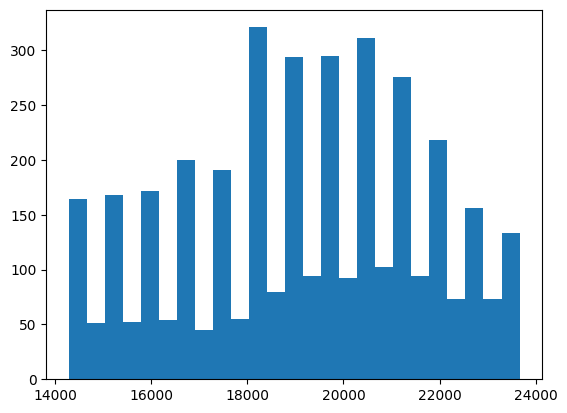

In [ ]:
plt.hist(alcohol['age'], bins=25)

In [ ]:
gender1 = hearts[hearts['gender']==1]

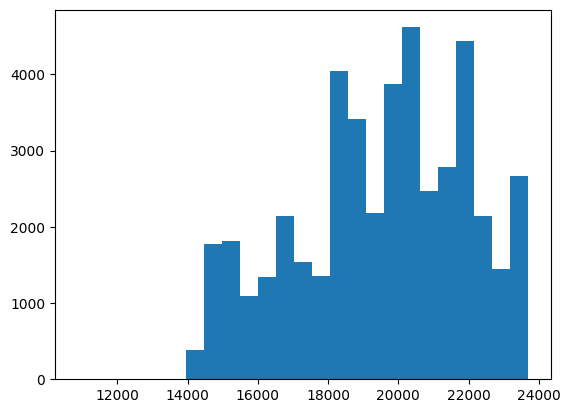

In [ ]:
plt.hist(gender1['age'], bins=25);

In [ ]:
np.unique(hearts['gender'], return_counts=True)

(array([1, 2]), array([45530, 24470]))

In [ ]:
gender2 = hearts[hearts['gender']==2]

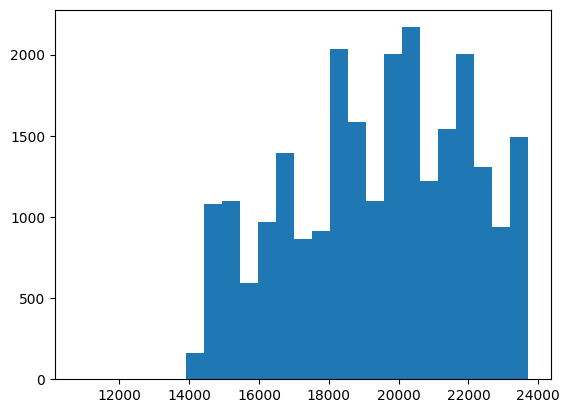

In [ ]:
plt.hist(gender2['age'], bins=25);

In [ ]:
years = gender1.groupby(by='years', as_index=False).agg({"id":"count"})

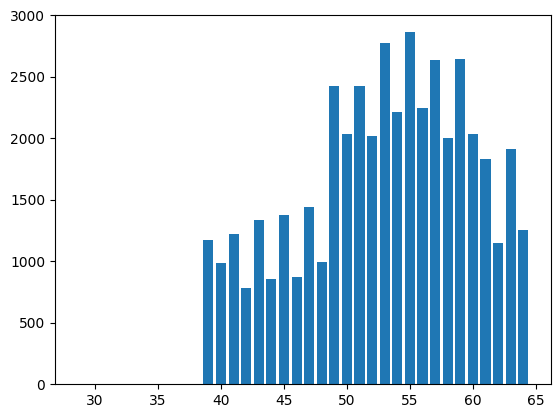

In [ ]:
plt.bar(x=years['years'], height=years['id']);

In [ ]:
np.unique(hearts['age'], return_counts=True)

(array([10798, 10859, 10878, ..., 23692, 23701, 23713]),
 array([1, 1, 1, ..., 1, 1, 1]))

## 2020 Survey

In [ ]:
survey = pd.read_csv("heart_2020_cleaned.csv")

In [ ]:
survey

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
np.unique(survey['Sex'], return_counts=True)

(array(['Female', 'Male'], dtype=object), array([167805, 151990]))

In [ ]:
np.unique(survey['Race'], return_counts=True)

(array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
        'Other', 'White'], dtype=object),
 array([  5202,   8068,  22939,  27446,  10928, 245212]))

In [ ]:
ages,counts = np.unique(survey['AgeCategory'], return_counts=True)

In [ ]:
ages

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

In [ ]:
def fix_sex(score):
  if score == "Male": return 0
  return 1

In [ ]:
def fix_binary(score):
  if score == "No": return 0
  return 1

In [ ]:
for column in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
  survey[column] = survey[column].apply(fix_binary)

In [ ]:
survey['Sex'] = survey['Sex'].apply(fix_sex)

In [ ]:
survey

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [ ]:
def fix_agecategory(score):
  return np.where(ages == score)[0][0]

In [ ]:
survey['AgeCategory'].apply(fix_agecategory)

0          7
1         12
2          9
3         11
4          4
          ..
319790     8
319791     3
319792     5
319793     1
319794    12
Name: AgeCategory, Length: 319795, dtype: int64

In [ ]:
survey['Age'] = survey['AgeCategory'].apply(fix_agecategory)

In [ ]:
np.unique(survey['HeartDisease'], return_counts=True)

(array([0, 1]), array([292422,  27373]))

In [ ]:
292422/319795

0.9144045404086993

In [ ]:
np.unique(survey['GenHealth'], return_counts=True)

(array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype=object),
 array([ 66842,  34677,  93129,  11289, 113858]))

In [ ]:
def fix_genhealth(score):
  if score == 'Excellent': return 5
  if score == 'Very good': return 4
  if score == 'Good': return 3
  if score == 'Fair': return 2
  if score == 'Poor': return 1
  return float('nan')

In [ ]:
survey['GenHealth'] = survey['GenHealth'].apply(fix_genhealth)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
survey.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Age'],
      dtype='object')

In [ ]:
# This is the cell to change!!
features = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Age']

In [ ]:
np.abs(survey.corr()['HeartDisease']).sort_values()

<ipython-input-22-cc72a8d242da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(survey.corr()['HeartDisease']).sort_values()


SleepTime           0.008327
MentalHealth        0.028591
AlcoholDrinking     0.032080
Asthma              0.041444
BMI                 0.051803
Sex                 0.070040
SkinCancer          0.093317
PhysicalActivity    0.100030
Smoking             0.107764
KidneyDisease       0.145197
PhysicalHealth      0.170721
Diabetic            0.170977
Stroke              0.196835
DiffWalking         0.201258
Age                 0.233432
GenHealth           0.243182
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

In [ ]:
features = ["SleepTime",
"MentalHealth",
"AlcoholDrinking",
"Asthma",
"BMI",
"Sex",
"SkinCancer",
"PhysicalActivity",
"Smoking",
"KidneyDisease",
"PhysicalHealth",
"Diabetic",
"Stroke",
"DiffWalking",
"Age",
"GenHealth"]

In [ ]:
features = ["GenHealth",
#"SleepTime",
#"MentalHealth",
#"AlcoholDrinking",
"Asthma",
#"BMI",
"Sex",
"SkinCancer",
#"PhysicalActivity",
"Smoking",
"KidneyDisease",
"PhysicalHealth",
"Diabetic",
"Stroke",
"DiffWalking",
"Age"]

#Healthy v Nonhealthy (weighting the data)


In [ ]:
healthy = survey[survey['HeartDisease'] == 0]

In [ ]:
healthy

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,4,5.0,1,0,1,7
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,4,7.0,0,0,0,12
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,2,8.0,1,0,0,9
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,3,6.0,0,0,1,11
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,4,8.0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,1,18-24,Hispanic,0,1,5,8.0,0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,0,1,4,5.0,1,0,0,3
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,0,1,3,6.0,0,0,0,5
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,0,0,3,12.0,0,0,0,1


In [ ]:
healthy.sample(27000, replace = False, random_state = 42)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
111390,0,25.02,0,0,0,0.0,7.0,0,1,50-54,White,0,1,3,6.0,1,0,1,6
250162,0,23.30,0,0,0,0.0,0.0,0,1,50-54,Black,0,1,3,7.0,0,0,0,6
230713,0,25.77,1,0,0,0.0,0.0,0,0,45-49,White,0,1,4,4.0,1,0,0,5
153210,0,25.61,1,1,1,2.0,30.0,0,1,25-29,White,1,0,2,6.0,0,0,0,1
149117,0,31.16,1,0,0,0.0,0.0,1,1,65-69,Black,0,1,2,7.0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236464,0,26.39,1,0,0,30.0,2.0,0,0,35-39,Black,1,1,2,7.0,0,0,0,3
28200,0,25.89,0,0,0,0.0,3.0,0,1,50-54,Hispanic,1,1,3,6.0,0,0,0,6
3263,0,34.33,0,0,0,0.0,0.0,0,1,25-29,Black,0,1,5,8.0,1,0,0,1
223006,0,34.46,1,0,0,0.0,25.0,1,0,65-69,White,0,1,3,5.0,0,0,0,9


In [ ]:
nonhealthy = survey[survey['HeartDisease'] == 1]

In [ ]:
nonhealthy.sample(27000, replace = False, random_state = 42)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
64852,1,25.61,1,0,1,30.0,30.0,0,1,50-54,Asian,0,1,1,3.0,0,0,1,6
190360,1,27.12,1,0,0,3.0,0.0,0,0,75-79,White,1,1,3,7.0,0,0,0,11
154433,1,30.90,0,0,1,4.0,30.0,1,1,70-74,White,1,0,2,7.0,1,1,0,10
119496,1,27.46,0,0,0,0.0,0.0,0,1,70-74,White,1,1,5,8.0,0,0,0,10
168558,1,26.63,1,0,0,0.0,0.0,0,0,80 or older,White,0,0,5,5.0,0,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101911,1,22.60,0,0,0,10.0,0.0,1,1,75-79,White,0,1,2,6.0,0,0,0,11
40979,1,25.99,1,0,0,0.0,0.0,0,0,80 or older,White,0,1,3,9.0,0,0,0,12
168985,1,21.48,1,0,0,30.0,0.0,1,1,80 or older,White,0,0,1,7.0,1,0,0,12
167357,1,38.41,0,0,0,30.0,15.0,0,1,65-69,White,1,0,3,6.0,0,0,1,9


In [ ]:
X = pd.concat([nonhealthy.sample(27000, replace = False, random_state = 42), healthy.sample(27000, replace = False, random_state = 42) ])

In [ ]:
X

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
64852,1,25.61,1,0,1,30.0,30.0,0,1,50-54,Asian,0,1,1,3.0,0,0,1,6
190360,1,27.12,1,0,0,3.0,0.0,0,0,75-79,White,1,1,3,7.0,0,0,0,11
154433,1,30.90,0,0,1,4.0,30.0,1,1,70-74,White,1,0,2,7.0,1,1,0,10
119496,1,27.46,0,0,0,0.0,0.0,0,1,70-74,White,1,1,5,8.0,0,0,0,10
168558,1,26.63,1,0,0,0.0,0.0,0,0,80 or older,White,0,0,5,5.0,0,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236464,0,26.39,1,0,0,30.0,2.0,0,0,35-39,Black,1,1,2,7.0,0,0,0,3
28200,0,25.89,0,0,0,0.0,3.0,0,1,50-54,Hispanic,1,1,3,6.0,0,0,0,6
3263,0,34.33,0,0,0,0.0,0.0,0,1,25-29,Black,0,1,5,8.0,1,0,0,1
223006,0,34.46,1,0,0,0.0,25.0,1,0,65-69,White,0,1,3,5.0,0,0,0,9


# Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features], X['HeartDisease'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# algorithm cell knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
#partial model with physical activity knn
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
knnPAResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
knnPAResults

array([0.739, 0.725, 0.734, 0.732])

In [ ]:
#partial model without physical activity knn
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
knnResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
knnResults

array([0.736, 0.732, 0.735, 0.734])

In [ ]:
import xgboost as xgb

In [ ]:
# algorithm cell xgb
xgbm = xgb.XGBClassifier()
xgbm = xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)

In [ ]:
#full model xgb
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)


array([0.799, 0.722, 0.769, 0.76 ])

In [ ]:
#partial model with physical activity xgb
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
xgbPAResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
xgbPAResults

array([0.801, 0.722, 0.771, 0.762])

In [ ]:
#partial model without physical activity xgb
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
xgbResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
xgbResults

array([0.804, 0.722, 0.773, 0.763])

In [ ]:
y_pred_xgbm = y_pred

In [ ]:
y_acc_xgb = y_test == y_pred_xgbm

In [ ]:
y_acc_xgb.astype(int)

232294    1
137002    1
120290    1
34878     1
144276    1
         ..
219519    1
46668     1
204466    1
223321    0
263182    0
Name: HeartDisease, Length: 10800, dtype: int64

In [ ]:
# algorithm cell rf
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# partial model without physical activity rf
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
rfResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
rfResults

array([0.764, 0.721, 0.748, 0.742])

In [ ]:
# partial model with physical activity rf
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
rfPAResults = np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)
rfPAResults

array([0.747, 0.731, 0.741, 0.739])

In [ ]:
y_pred_rf = y_pred

In [ ]:
y_acc_rf = y_test == y_pred_rf

In [ ]:
y_acc_rf.astype(int)

232294    1
137002    1
120290    1
34878     1
144276    1
         ..
219519    1
46668     1
204466    1
223321    1
263182    0
Name: HeartDisease, Length: 10800, dtype: int64

In [ ]:
np.unique((2 * y_acc_rf.astype(int) + y_acc_xgb.astype(int)),return_counts = True)

(array([0, 1, 2, 3]), array([2305,  320,  253, 7922]))

In [ ]:
# full model rf
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
f1 = 2 * precision * recall / (precision + recall)
np.round([se, sp, f1, (tn+tp)/(tn+tp+fp+fn)], 3)

array([0.772, 0.707, 0.748, 0.739])

# Graphs af

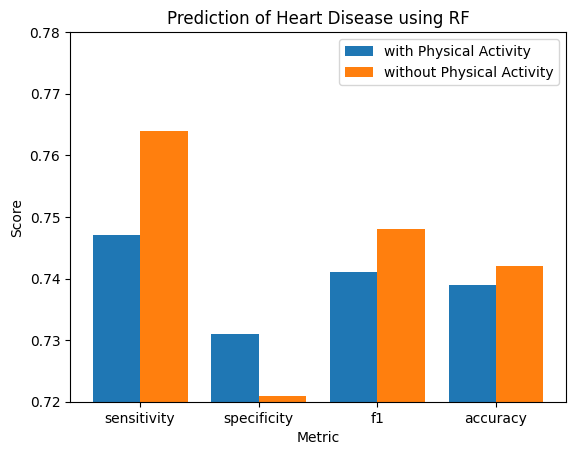

In [ ]:
x = ["sensitivity", "specificity", "f1", "accuracy"]
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i + w for i in bar1]

plt.bar(bar2, rfResults, w, label ="without Physical Activity")
plt.bar(bar1, rfPAResults, w, label ="with Physical Activity")



plt.ylim(0.72, 0.78)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Prediction of Heart Disease using RF")
plt.xticks(bar1 + w/2,x)
plt.legend()
plt.show()


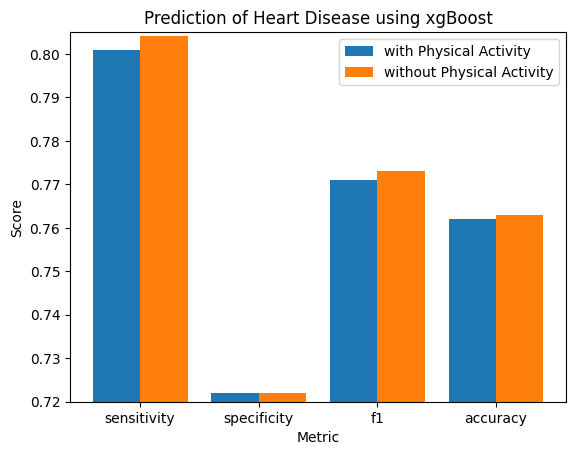

In [ ]:
x = ["sensitivity", "specificity", "f1", "accuracy"]
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i + w for i in bar1]

plt.bar(bar1, xgbPAResults, w, label ="with Physical Activity")
plt.bar(bar2, xgbResults, w, label ="without Physical Activity")


plt.ylim(0.72, 0.805)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Prediction of Heart Disease using xgBoost")
plt.xticks(bar1 + w/2,x)
plt.legend()
plt.show()

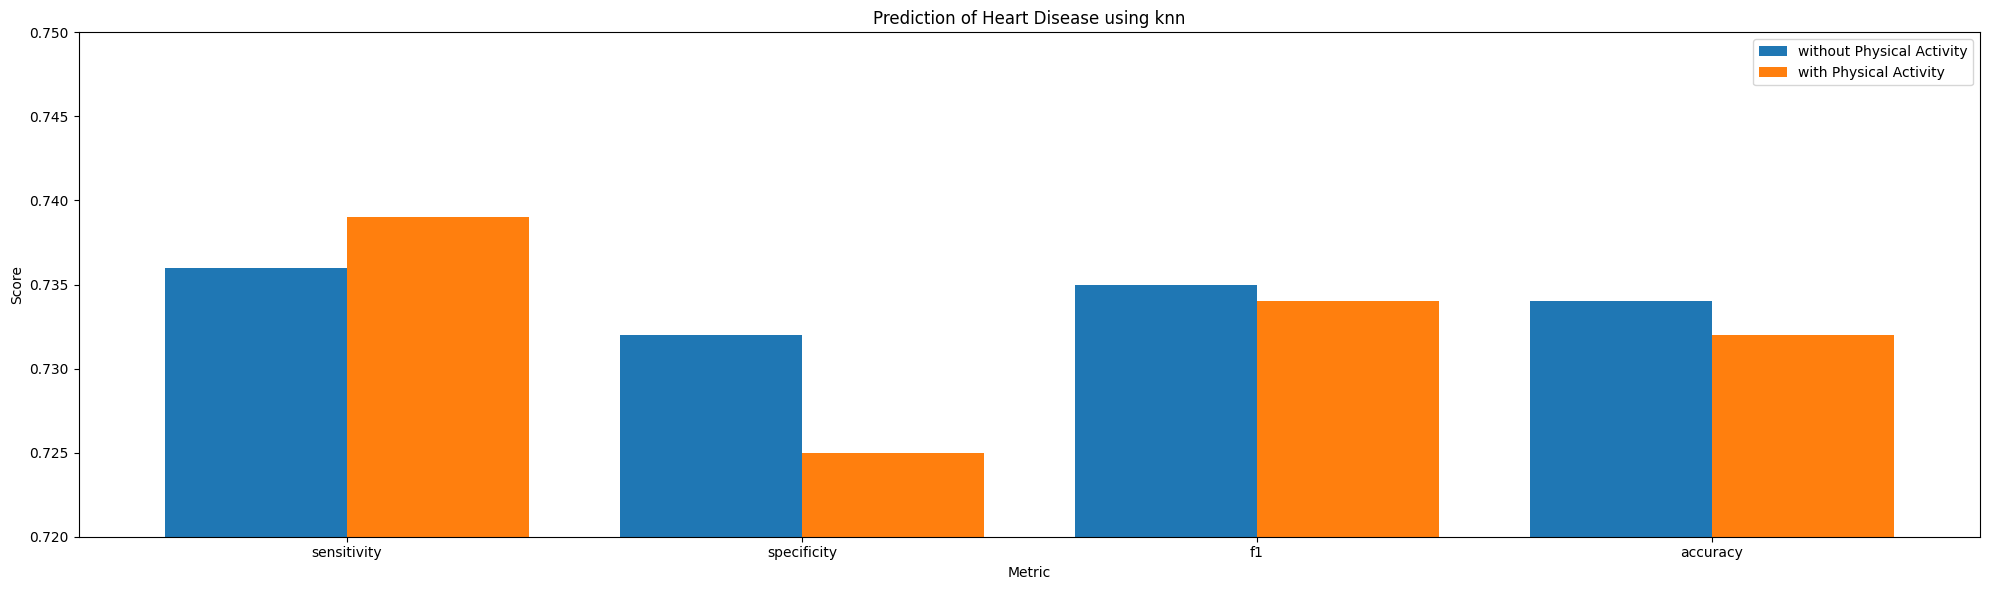

In [ ]:
x = ["sensitivity", "specificity", "f1", "accuracy"]
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i + w for i in bar1]
#alter size/shape of figure
plt.figure(figsize = (20, 6))


plt.bar(bar1, knnResults, w, label ="without Physical Activity")
plt.bar(bar2, knnPAResults, w, label ="with Physical Activity")



plt.ylim(0.72, 0.75)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Prediction of Heart Disease using knn")
plt.xticks(bar1 + w/2,x)
plt.legend()
#save to google drive
plt.tight_layout()
plt.savefig("knn_fat.pdf")

#ChiSquare Testing


In [ ]:
from scipy.stats import chisquare

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
data=[2305,320],[253,7922]
res = mcnemar(data, exact=False)
alpha=0.05
print('Chi-square statistic:',res.statistic)
print('Pvalue:',res.pvalue)
if res.pvalue < alpha:
    print('Models are different')
else:
    print('Models are same')



Chi-square statistic: 7.602094240837697
Pvalue: 0.005830054391631046
Models are different


fail to reject the null (models are different) because p val < .05

In [ ]:
# rf without sleeptime, mentalhealth, BMI, physicalactivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
se, sp, (tn+tp)/(tn+tp+fp+fn)

(0.1221387696709585, 0.980931005533949, 0.9058459325505402)

In [ ]:
# rf without sleeptime, mentalhealth, BMI, physicalactivity, physicalhealth
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
se, sp, (tn+tp)/(tn+tp+fp+fn)

(0.09907010014306152, 0.988024054688437, 0.9103019121624791)

In [ ]:
# rf without sleeptime, mentalhealth, BMI, physicalactivity, physicalhealth, alcohol
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
se = tp/(tp+fn)
sp = tn/(tn+fp)
se, sp, (tn+tp)/(tn+tp+fp+fn)

(0.094241773962804, 0.9886065756334915, 0.9104113572757547)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
def coefplot(results, subject):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['Intercept'])

    # Sort values by coef ascending
    #coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='barh',
                 ax=ax, color='none', fontsize=22,
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients for '+subject+' model w/ 95% CIs',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(y=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               x=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

    return plt.show()

In [ ]:
depvar = "HeartDisease"
modfull = smf.ols(formula=depvar + ' ~ Smoking + Stroke + DiffWalking + Sex + Diabetic + GenHealth + Asthma + KidneyDisease + SkinCancer + Age', data=survey)
modfull = modfull.fit()

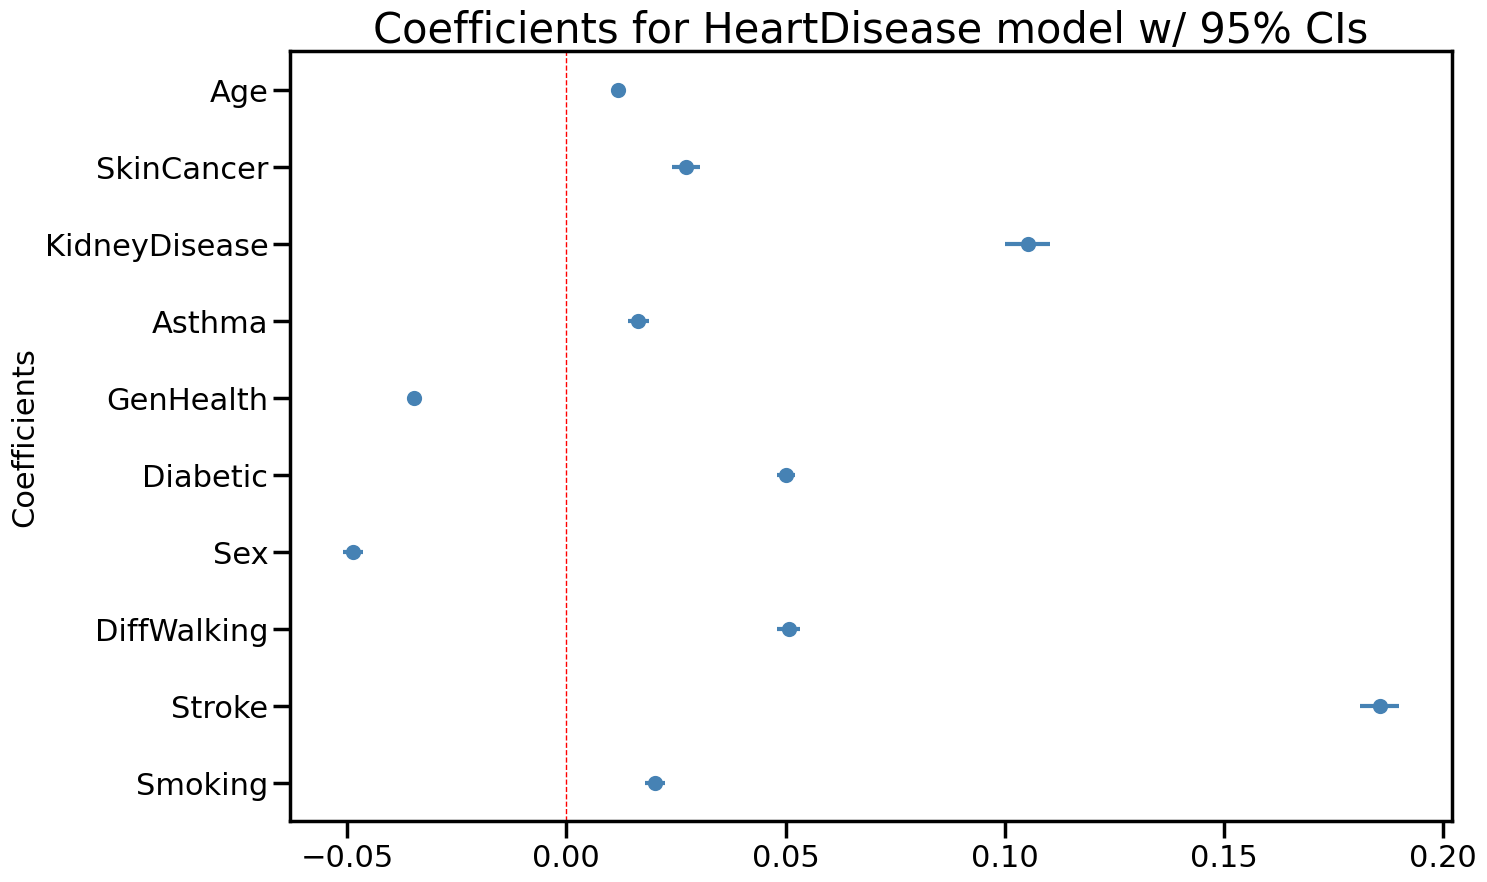

In [ ]:
coefplot(modfull, depvar)

In [ ]:
modfull.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3997.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:31:28   Log-Likelihood:                -22338.
No. Observations:              319795   AIC:                         4.470e+04
Df Residuals:                  319781   BIC:                         4.485e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1262      0.004     35.843      0.000       0.119       0.133
BMI                -0.0006    7.6e-05     -7.649      0.000      -0.001      -0.000
Smoking             0.0208      0.001     21.544      0.000       0.019       0.023
AlcoholDrinking    -0.0151      0.002     -8.218      0.000      -0.019      -0.012
Stroke              0.1834      0.002     74.026      0.000       0.179       0.188
PhysicalHealth      0.0012   6.91e-05     16.755      0.000       0.001       0.001
DiffWalking         0.0444      0.002     28.217      0.000       0.041       0.047
Sex                -0.0492      0.001    -52.853      0.000      -0.051      -0.047
Diabetic            0.0515      0.001     37.911      0.000       0.049       0.054
GenHealth          -0.0321      0.001    -58.760      0.000      -0.033      -0.031
Asthma              0.0160      0.001     11.638      0.000       0.013       0.019
KidneyDisease       0.1030      0.003     41.073      0.000       0.098       0.108
SkinCancer          0.0266      0.002     16.203      0.000       0.023       0.030
Age                 0.0117      0.000     81.921      0.000       0.011       0.012
==============================================================================
Omnibus:                   151134.668   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           691764.511
Skew:                           2.379   Prob(JB):                         0.00
Kurtosis:                       8.410   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Years analysis

In [ ]:
years = survey.groupby(by=['AgeCategory','HeartDisease'], as_index=False).agg({"SleepTime":"count", "BMI":"mean"})

In [ ]:
years

,AgeCategory,HeartDisease,SleepTime,BMI
0,18-24,No,20934,25.760941
1,18-24,Yes,130,26.057231
2,25-29,No,16822,27.685525
3,25-29,Yes,133,28.078872
4,30-34,No,18527,28.419135
5,30-34,Yes,226,30.151062
6,35-39,No,20254,28.813813
7,35-39,Yes,296,30.536993
8,40-44,No,20520,29.135306
9,40-44,Yes,486,31.921358


In [ ]:
yesses = years[years['HeartDisease']=="Yes"]
nos = years[years['HeartDisease']=="No"]

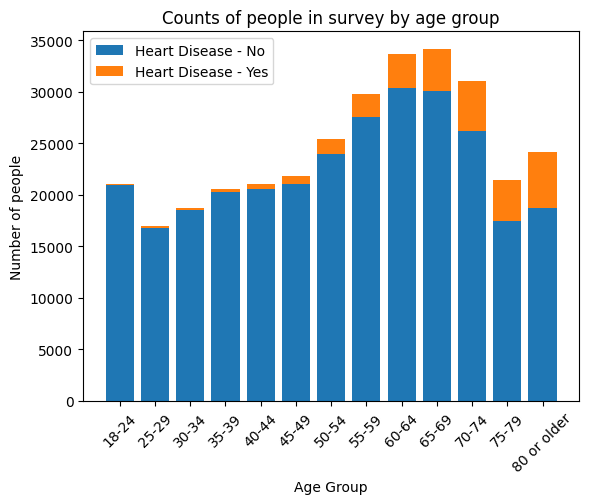

In [ ]:
plt.bar(x=nos['AgeCategory'], height=nos['SleepTime'], label="Heart Disease - No")
plt.bar(x=yesses['AgeCategory'], height=yesses['SleepTime'], bottom=nos['SleepTime'], label="Heart Disease - Yes")
plt.xticks(rotation=45)
plt.title("Counts of people in survey by age group")
plt.xlabel("Age Group")
plt.ylabel("Number of people")
plt.legend();